<a href="https://colab.research.google.com/github/learn-python-and-r/IST-652/blob/master/Unit_9_IST_652_Unstructured_Data_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

### Topic outline

- Collecting text data from Twitter.

- Text processing basics:
  - Tokenization.
  - Text formatting and cleaning

### Packages discussed

- tweepy
- nltk


# Collecting text data from Twitter.
- signing up for a developer account.
- authentication
- searching and extracting text data from the Twitter API.

# Signing up for a developer account

https://developer.twitter.com/en

- Once you sign up for this account you can get the authentication credentials you need.

- **PRO TIP** ONLY FILL OUT THE REQUIRED INFO. ANY ADDITIONAL INFO THAT YOU FILL OUT MAY DELAY YOUR ABILITY TO CONNECT! 

# Authentication

- pass your credentials to Twitter to gain access to their data stream.

- first have to install the *tweepy* package.

In [0]:
# Install twitter package
!pip install tweepy
!pip install nltk

- next we enter our credentials that we retreive from our developer account

In [0]:
import tweepy

CONSUMER_KEY = '5zLyTQPA00z5xamvWnBnvkIdn' #API Key
CONSUMER_SECRET = 'K3ruTTW4yrbWuIiQ1EArEoBRVtsWY9CmIG46PMGOyq0byxhuTS' # API secret Key
OAUTH_TOKEN = '18249358-Iam7USUCf0UFlyK5uIOvUajSczOJZSQgJsJXgs4Pq' # Access Token
OAUTH_SECRET = 'g6SnD2m7bUjUEhHW2C3tTAK3GHfHPi4ln8OPpR32Qg0xh' # Access Token Secret

 # Authorization to consumer key and consumer secret 
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET) 
  
# Access to user's access key and access secret 
auth.set_access_token(OAUTH_TOKEN, OAUTH_SECRET) 
  
# Calling api 
api = tweepy.API(auth) 

api

# searching and extracting text data from the Twitter API.

- We are going to extract tweet information from a single user but there are MANY other things that you can do with tweepy

- Check out the documentation here: http://docs.tweepy.org/en/v3.5.0/api.html#tweepy-api-twitter-api-wrapper

In [0]:
# Collect tweet info from a single user
tweets = api.user_timeline(screen_name='@SyracuseU')
len(tweets) 

20

In [0]:
tweets[0]

Status(_api=<tweepy.api.API object at 0x7fb3b83e8490>, _json={'created_at': 'Sat May 30 20:32:47 +0000 2020', 'id': 1266829932858146820, 'id_str': '1266829932858146820', 'text': 'RT @SUcampus: In the midst of this time of tremendous pain, sorrow, anger and concern, University leaders discuss the impact of racism and…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'SUcampus', 'name': 'SU Campus', 'id': 407922176, 'id_str': '407922176', 'indices': [3, 12]}], 'urls': []}, 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 125688706, 'id_str': '125688706', 'name': 'Syracuse University', 'screen_name': 'SyracuseU', 'location': 'Syracuse, New York', 'description': 'Syracuse University is dedicated to rigorous scholarship and transforma

In [0]:
tweets[0]._json

{'created_at': 'Sat May 30 20:32:47 +0000 2020',
 'id': 1266829932858146820,
 'id_str': '1266829932858146820',
 'text': 'RT @SUcampus: In the midst of this time of tremendous pain, sorrow, anger and concern, University leaders discuss the impact of racism and…',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'SUcampus',
    'name': 'SU Campus',
    'id': 407922176,
    'id_str': '407922176',
    'indices': [3, 12]}],
  'urls': []},
 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 125688706,
  'id_str': '125688706',
  'name': 'Syracuse University',
  'screen_name': 'SyracuseU',
  'location': 'Syracuse, New York',
  'description': 'Syracuse University is dedicated to rigorous scholarship and transformative research. #S

These are limited to 20 but you can use the 'pages' option to get more

In [0]:
# Note each page will have 20 tweets
syrtweets = []
no_of_pages = 2
for i in range(no_of_pages):
    syrtweets.append(api.user_timeline('@SyracuseU', page = i))

In [0]:
# This is a list that has 2 'pages' containing 20 tweet objects each
print(syrtweets[0][0])

# Let's put all these objects in one list
syrtweets_clean = []
for page in syrtweets:
  for tweet in page:
    syrtweets_clean.append(tweet)


Status(_api=<tweepy.api.API object at 0x7fb3b83e8490>, _json={'created_at': 'Sat May 30 20:32:47 +0000 2020', 'id': 1266829932858146820, 'id_str': '1266829932858146820', 'text': 'RT @SUcampus: In the midst of this time of tremendous pain, sorrow, anger and concern, University leaders discuss the impact of racism and…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'SUcampus', 'name': 'SU Campus', 'id': 407922176, 'id_str': '407922176', 'indices': [3, 12]}], 'urls': []}, 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 125688706, 'id_str': '125688706', 'name': 'Syracuse University', 'screen_name': 'SyracuseU', 'location': 'Syracuse, New York', 'description': 'Syracuse University is dedicated to rigorous scholarship and transforma

In [0]:
len(syrtweets_clean)

40

In [0]:
syrtweets_clean[0]

AttributeError: ignored

-  What info can we get from these tweet objects?

In [0]:
# First let's extract the JSON info
syrtweets_clean = [x._json for x in syrtweets_clean]
syrtweets_clean0

In [0]:
# Another option to collect text data only
#syrtweets_clean = [x.text for x in syrtweets_clean]

In [0]:
syrtweets_clean[0]

{'created_at': 'Sat May 30 20:32:47 +0000 2020',
 'id': 1266829932858146820,
 'id_str': '1266829932858146820',
 'text': 'RT @SUcampus: In the midst of this time of tremendous pain, sorrow, anger and concern, University leaders discuss the impact of racism and…',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'SUcampus',
    'name': 'SU Campus',
    'id': 407922176,
    'id_str': '407922176',
    'indices': [3, 12]}],
  'urls': []},
 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 125688706,
  'id_str': '125688706',
  'name': 'Syracuse University',
  'screen_name': 'SyracuseU',
  'location': 'Syracuse, New York',
  'description': 'Syracuse University is dedicated to rigorous scholarship and transformative research. #S

- let's extract the text only

In [0]:
tweettext = [x['text'] for x in syrtweets_clean]

 - These tweets are ugly and have too many characters and other garbage. We need to clean them.

In [0]:
# These tweets are ugly and have too many characters and other garbage
tweettext[0:15]

['RT @SUcampus: In the midst of this time of tremendous pain, sorrow, anger and concern, University leaders discuss the impact of racism and…',
 'RT @NewhouseSU: We are proud to announce that @NewhouseSU has earned the @AEJMC Equity &amp; Diversity Award. \n\n“Diversity, equity and inclusio…',
 'Moving from the studio to a Zoom call, first-year acting students channel their inner creativity and improvisation… https://t.co/R8OUoOMed9',
 'RT @SUcampus: See the latest update on the framework to ensure #SyracuseU is fully equipped and prepared to safely resume campus operations…',
 'ours too https://t.co/JvfgASUKkp',
 'Otto is doing their part 🧡 https://t.co/qbXupbn5Tz',
 'RT @Cuse: The Boeheim Family is committed to supporting Orange student-athletes through the challenges we now face.\n\n#TogetherCuse 🍊\nhttps:…',
 "Motivated by a desire to make the most of opportunities that are scarce in his home country, Konstantinos '22 is re… https://t.co/94MAHM22Ws",
 "mornin' 🧡 https://t.co/9ZTWpv

In [0]:
!pip install tweet-preprocessor

In [0]:
from preprocessor.api import clean, tokenize, parse
# Clean the tweet text using pre processor
tweettext_clean = [clean(x) for x in tweettext]

In [0]:
# This looks better
tweettext_clean[0:10]

[': In the midst of this time of tremendous pain, sorrow, anger and concern, University leaders discuss the impact of racism and',
 ': We are proud to announce that has earned the Equity &amp; Diversity Award. Diversity, equity and inclusio',
 'Moving from the studio to a Zoom call, first-year acting students channel their inner creativity and improvisation',
 ': See the latest update on the framework to ensure is fully equipped and prepared to safely resume campus operations',
 'ours too',
 'Otto is doing their part',
 ': The Boeheim Family is committed to supporting Orange student-athletes through the challenges we now face. https:',
 "Motivated by a desire to make the most of opportunities that are scarce in his home country, Konstantinos '22 is re",
 "mornin'",
 ': Its the start of summer! The perfect season to wear orange (plus winter, spring, and fall too) Happy Memorial day!! htt']

# **Exercise** (3 minutes)

Using the 'syrtweets_clean' objects, extract the number of retweets for each tweet and save those retweets in a list.

In [0]:
## Code here ##
# Hint you can find this using the key 'retweet_count'

#retweet_nums = [x['retweet_count'] for x in trumptweets_clean]
#retweet_nums[0:10]

retweet_nums = [x['retweet_count'] for x in syrtweets_clean] 

[15, 4, 9, 13, 99, 38, 1, 28, 15]

# Text processing basics:

Tokenization.
Text formatting and cleaning.

In [0]:
!pip install stop_words
!pip install nltk

In [0]:
tweettext_clean[0]

': In the midst of this time of tremendous pain, sorrow, anger and concern, University leaders discuss the impact of racism and'

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jason/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

-  the first thing we need to do to begin processing these tweets is to tokenize them, or split them in some way.

- the can be done by sentence or n-gram where n is the number of word-phrases that the tokenizer extracts

In [0]:
# This is the second semi-cleaned tweet
tweettext_clean[1]

': We are proud to announce that has earned the Equity &amp; Diversity Award. Diversity, equity and inclusio'

In [0]:
# Sentence tokenization
from nltk.tokenize import sent_tokenize

tokenized_tweet_sent=sent_tokenize(tweettext_clean[1])
print(tokenized_tweet_sent)

[': We are proud to announce that has earned the Equity &amp; Diversity Award.', 'Diversity, equity and inclusio']


In [0]:
# 1-gram (word) tokenization

from nltk.tokenize import word_tokenize
tokenized_tweet_word=word_tokenize(tweettext_clean[1])
print(tokenized_tweet_word)

[':', 'We', 'are', 'proud', 'to', 'announce', 'that', 'has', 'earned', 'the', 'Equity', '&', 'amp', ';', 'Diversity', 'Award', '.', 'Diversity', ',', 'equity', 'and', 'inclusio']


In [0]:
# n-gram tokenization
from nltk import ngrams

tokenized_tweet_2gram = ngrams(tweettext_clean[1].split(), 3)

for gram in tokenized_tweet_2gram:
  print(' '.join(gram))


: We are
We are proud
are proud to
proud to announce
to announce that
announce that has
that has earned
has earned the
earned the Equity
the Equity &amp;
Equity &amp; Diversity
&amp; Diversity Award.
Diversity Award. Diversity,
Award. Diversity, equity
Diversity, equity and
equity and inclusio


In [0]:
# We can then store this in a list for analysis
bigram_list = []
tokenized_tweet_2gram = ngrams(tweettext_clean[1].split(), 2)
for gram in tokenized_tweet_2gram:
  bigram_list.append((' '.join(gram)))

bigram_list[0:3]

[': We', 'We are', 'are proud']

# **Exercise** (5 minutes)

Create a list called "tokenized_tweets" which contains a tokenized version of every tweet in the list "tweettext_clean"

In [0]:
# Code here

tokenized_tweets_all = []
for tweet in tweettext_clean:
  temp_token = word_tokenize(tweet)
  tokenized_tweets_all.append(temp_token)

tokenized_tweets_all[4]

['CHINA', '!']

In [0]:
tweettext_clean[0:10]

[': In the midst of this time of tremendous pain, sorrow, anger and concern, University leaders discuss the impact of racism and',
 ': We are proud to announce that has earned the Equity &amp; Diversity Award. Diversity, equity and inclusio',
 'Moving from the studio to a Zoom call, first-year acting students channel their inner creativity and improvisation',
 ': See the latest update on the framework to ensure is fully equipped and prepared to safely resume campus operations',
 'ours too',
 'Otto is doing their part',
 ': The Boeheim Family is committed to supporting Orange student-athletes through the challenges we now face. https:',
 "Motivated by a desire to make the most of opportunities that are scarce in his home country, Konstantinos '22 is re",
 "mornin'",
 ': Its the start of summer! The perfect season to wear orange (plus winter, spring, and fall too) Happy Memorial day!! htt']

- let's do some additional processing to standardize the texts by making all the words lowercase

In [0]:
tweettext_clean2 = []
for tweet in tweettext_clean:
  if (len(tweet)) > 3:
    tweettext_clean2.append(tweet.lower())


tweettext_clean2[0:10]

[': in the midst of this time of tremendous pain, sorrow, anger and concern, university leaders discuss the impact of racism and',
 ': we are proud to announce that has earned the equity &amp; diversity award. diversity, equity and inclusio',
 'moving from the studio to a zoom call, first-year acting students channel their inner creativity and improvisation',
 ': see the latest update on the framework to ensure is fully equipped and prepared to safely resume campus operations',
 'ours too',
 'otto is doing their part',
 ': the boeheim family is committed to supporting orange student-athletes through the challenges we now face. https:',
 "motivated by a desire to make the most of opportunities that are scarce in his home country, konstantinos '22 is re",
 "mornin'",
 ': its the start of summer! the perfect season to wear orange (plus winter, spring, and fall too) happy memorial day!! htt']

- Tokenization is the first step toward doing more advanced text analysis, but you can also use it to do some basic statistics like a frequency distribution.



In [0]:
# Turns a list into a string

def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

In [0]:
# Let's combine all the tweets into a giant string and calculate the word frequencies
tweet_string = listToString(tweettext_clean2)
tweet_string

": in the midst of this time of tremendous pain, sorrow, anger and concern, university leaders discuss the impact of racism and : we are proud to announce that has earned the equity &amp; diversity award. diversity, equity and inclusio moving from the studio to a zoom call, first-year acting students channel their inner creativity and improvisation : see the latest update on the framework to ensure is fully equipped and prepared to safely resume campus operations ours too otto is doing their part : the boeheim family is committed to supporting orange student-athletes through the challenges we now face. https: motivated by a desire to make the most of opportunities that are scarce in his home country, konstantinos '22 is re mornin' : its the start of summer! the perfect season to wear orange (plus winter, spring, and fall too) happy memorial day!! htt a small-town kid who bled orange, bill harris , g79 reflects on decades of commitment to the syracuse community : today, and every day, w

- tokenize the tweets

In [0]:
from nltk.tokenize import word_tokenize
tokenized_tweet_word=word_tokenize(tweet_string)
len(tokenized_tweet_word)

640

In [0]:
from nltk.probability import FreqDist
tweet_frequencies = FreqDist(tokenized_tweet_word)
print(tweet_frequencies)

<FreqDist with 200 samples and 640 outcomes>


- what are the most common words?

In [0]:
tweet_frequencies.most_common(10)

[('the', 38),
 (',', 32),
 ('and', 24),
 (':', 20),
 ('of', 18),
 ('to', 18),
 ('a', 14),
 ('.', 10),
 ('!', 10),
 ('their', 8)]

### stop word removal

- these are words we generally find in all sentences called "stop words" so let's remove these first and then recalculate

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/jason/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'is', 'have', 'about', 'very', 'there', 'when', 'has', 'through', 'between', "should've", 'hadn', 'been', 'nor', 'its', "you'll", 'as', "hasn't", 'ma', 'am', 'by', 'further', 'off', 'myself', 'any', 'did', 'own', 'y', 'won', "shouldn't", 'more', 'i', 'few', "you're", 'hers', 'd', 'it', 'during', 'where', 'only', 'should', 'here', 'what', "she's", 'himself', 'then', "mightn't", 'same', 'not', 'an', 'your', 'than', 'mightn', 'who', 'too', 'didn', 'haven', 'such', 'these', 'couldn', 'being', 'itself', 'each', 'those', "wasn't", "wouldn't", 'wasn', 've', 'for', 'against', 'below', "don't", 'are', "didn't", 'wouldn', 'll', "mustn't", 'why', 'up', 'if', 'yourselves', "weren't", 'theirs', 'needn', 'ain', 'before', 'so', 'with', 'yours', 'him', "you'd", 'them', 'now', 'at', 'ourselves', 'can', 'his', 'a', 'don', 'm', 'how', 'yourself', 'her', 'of', 'above', 'that', 'all', 'be', "shan't", 'mustn', 'while', "that'll", 'was', 'and', 'had', 'on', 'under', 'he', "hadn't", "won't", 'some', 'hasn', 

In [0]:
stop_words.add(':')

In [0]:
tokenized_tweet_word_clean = []

# Remove additional 'stop' words by creating a list of words to remove
terms_to_remove=['twitter']

for word in tokenized_tweet_word:
  if (word not in stop_words) and (word not in terms_to_remove) and len(word)>2:
    tokenized_tweet_word_clean.append(word)

tokenized_tweet_word_clean

['midst',
 'time',
 'tremendous',
 'pain',
 'sorrow',
 'anger',
 'concern',
 'university',
 'leaders',
 'discuss',
 'impact',
 'racism',
 'proud',
 'announce',
 'earned',
 'equity',
 'diversity',
 'award',
 'diversity',
 'equity',
 'inclusio',
 'moving',
 'studio',
 'zoom',
 'call',
 'first-year',
 'acting',
 'students',
 'channel',
 'inner',
 'creativity',
 'improvisation',
 'see',
 'latest',
 'update',
 'framework',
 'ensure',
 'fully',
 'equipped',
 'prepared',
 'safely',
 'resume',
 'campus',
 'operations',
 'otto',
 'part',
 'boeheim',
 'family',
 'committed',
 'supporting',
 'orange',
 'student-athletes',
 'challenges',
 'face',
 'https',
 'motivated',
 'desire',
 'make',
 'opportunities',
 'scarce',
 'home',
 'country',
 'konstantinos',
 "'22",
 'mornin',
 'start',
 'summer',
 'perfect',
 'season',
 'wear',
 'orange',
 'plus',
 'winter',
 'spring',
 'fall',
 'happy',
 'memorial',
 'day',
 'htt',
 'small-town',
 'kid',
 'bled',
 'orange',
 'bill',
 'harris',
 'g79',
 'reflects',


In [0]:
# Remove additional 'stop' words by adding to the list of stop words
stop_words.add('twitter')

tokenized_tweet_word_clean = []

for word in tokenized_tweet_word:
  if (word not in stop_words) and len(word)>2:
    tokenized_tweet_word_clean.append(word)

tokenized_tweet_word_clean

['midst',
 'time',
 'tremendous',
 'pain',
 'sorrow',
 'anger',
 'concern',
 'university',
 'leaders',
 'discuss',
 'impact',
 'racism',
 'proud',
 'announce',
 'earned',
 'equity',
 'diversity',
 'award',
 'diversity',
 'equity',
 'inclusio',
 'moving',
 'studio',
 'zoom',
 'call',
 'first-year',
 'acting',
 'students',
 'channel',
 'inner',
 'creativity',
 'improvisation',
 'see',
 'latest',
 'update',
 'framework',
 'ensure',
 'fully',
 'equipped',
 'prepared',
 'safely',
 'resume',
 'campus',
 'operations',
 'otto',
 'part',
 'boeheim',
 'family',
 'committed',
 'supporting',
 'orange',
 'student-athletes',
 'challenges',
 'face',
 'https',
 'motivated',
 'desire',
 'make',
 'opportunities',
 'scarce',
 'home',
 'country',
 'konstantinos',
 "'22",
 'mornin',
 'start',
 'summer',
 'perfect',
 'season',
 'wear',
 'orange',
 'plus',
 'winter',
 'spring',
 'fall',
 'happy',
 'memorial',
 'day',
 'htt',
 'small-town',
 'kid',
 'bled',
 'orange',
 'bill',
 'harris',
 'g79',
 'reflects',


- let's run the frequency distribution again

In [0]:
from nltk.probability import FreqDist
tweet_frequencies_clean = FreqDist(tokenized_tweet_word_clean)

tweet_frequencies_clean.most_common(10)

[('update', 6),
 ('orange', 6),
 ('impact', 4),
 ('equity', 4),
 ('diversity', 4),
 ('latest', 4),
 ('spring', 4),
 ('fall', 4),
 ('happy', 4),
 ('day', 4)]

- Let's plot the frequencies

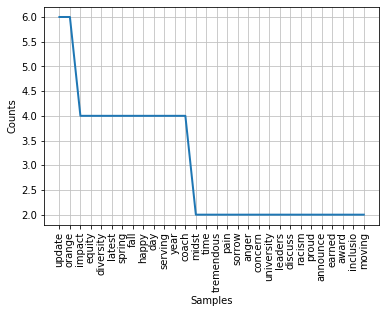

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
import os

tweet_frequencies_clean.plot(30,cumulative=False)

# Save a high res plot to my desktop

# Save the plot
plt.savefig('syrtweets.png',dpi = 2000)